## **Import necessary libraries**





In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, auc
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

import warnings
warnings.filterwarnings("ignore")


##**Loading the Fashion mnist dataset**

In [ ]:
# Load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

##**Class declaration for nomenclature**

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##**Print dimensions of the data and images**


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
# Dimensions of the images
X_train[0].shape

(28, 28)

##**Visualizing 15 images from the dataset**

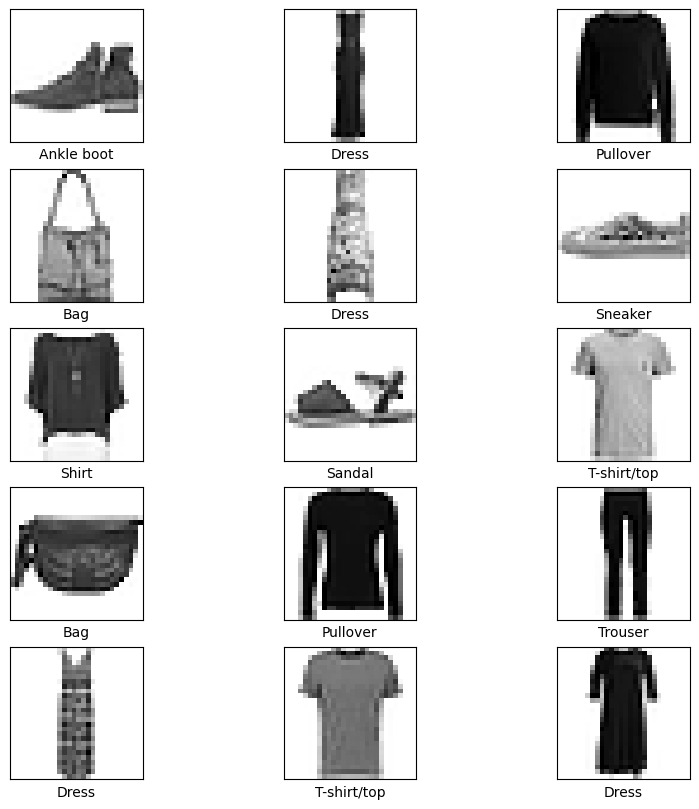

In [ ]:
plt.figure(figsize=(10,10))

for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# Reshape data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

''' Or can be written as below;
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
'''

In [ ]:
# Normalize the data
'''divison to 250 because each pixel ranges from 0 to 250 and we normalize them
by dividing to 250 to get values between 0 and 1'''
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Split data into training and validation(test) sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)


In [ ]:
# First convolutional layer.
# Number of neurons = 32
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )

In [ ]:
# Second convolutional layer.
# Number of neurons = 64
conv2 = layers.Conv2D(64, (3,3), activation='relu')

In [ ]:
# Third convolutional layer.
# Number of neurons = 128
conv3 = layers.Conv2D(128, (3,3), activation='relu')

In [ ]:
#Creating first Max. Pooling Layer
max_pool_1 = layers.MaxPooling2D((2,2))

#Creating second Max. Pooling Layer
max_pool_2 = layers.MaxPooling2D((2,2))

#Creating third Max. Pooling Layer
max_pool_3 = layers.MaxPooling2D((2,2))

In [ ]:
'''Fully Connected (FC) Layer hidden layer expects input in 1-D format (1-D array), hence, we need to convert
2-D output (2-D array) of last convolutional layer (conv3) to 1-D array we need to flatten the 2-D array
to 1-D array'''

flat_layer = layers.Flatten()

In [ ]:
# Fully Connected (FC) Layer - Hidden(Dense) Layer

fc = layers.Dense(128, activation='relu')

In [ ]:
# Output Layer - with 10 neurons (because we have 10 output classes)

output = layers.Dense(10, 'softmax')

In [ ]:
# Creating first dropout layer (for the first Conv. layer 'conv1')
drop_1 = tf.keras.layers.Dropout(0.5)
# Creating second dropout layer (for the second Conv. layer 'conv2')
drop_2 = tf.keras.layers.Dropout(0.5)
# Creating third dropout layer (for the third Conv. layer 'conv3')
drop_3 = tf.keras.layers.Dropout(0.5)

In [ ]:
#Model Creation
model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(max_pool_2)
model.add(drop_2)
model.add(conv3)
model.add(max_pool_3)
model.add(drop_3)
model.add(flat_layer)
model.add(fc)
model.add(output)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_split=0.1)

Epoch 1/20
71/71 [==============================] - 139s 2s/step - loss: 0.9333 - accuracy: 0.6580 - val_loss: 0.5770 - val_accuracy: 0.7886
Epoch 2/20
71/71 [==============================] - 135s 2s/step - loss: 0.5218 - accuracy: 0.8062 - val_loss: 0.4598 - val_accuracy: 0.8428
Epoch 3/20
71/71 [==============================] - 134s 2s/step - loss: 0.4498 - accuracy: 0.8362 - val_loss: 0.3997 - val_accuracy: 0.8595
Epoch 4/20
71/71 [==============================] - 134s 2s/step - loss: 0.4053 - accuracy: 0.8532 - val_loss: 0.3638 - val_accuracy: 0.8667
Epoch 5/20
71/71 [==============================] - 132s 2s/step - loss: 0.3733 - accuracy: 0.8633 - val_loss: 0.3434 - val_accuracy: 0.8794
Epoch 6/20
71/71 [==============================] - 134s 2s/step - loss: 0.3508 - accuracy: 0.8733 - val_loss: 0.3280 - val_accuracy: 0.8898
Epoch 7/20
71/71 [==============================] - 135s 2s/step - loss: 0.3304 - accuracy: 0.8805 - val_loss: 0.3179 - val_accuracy: 0.8856
Epoch 8/20
71

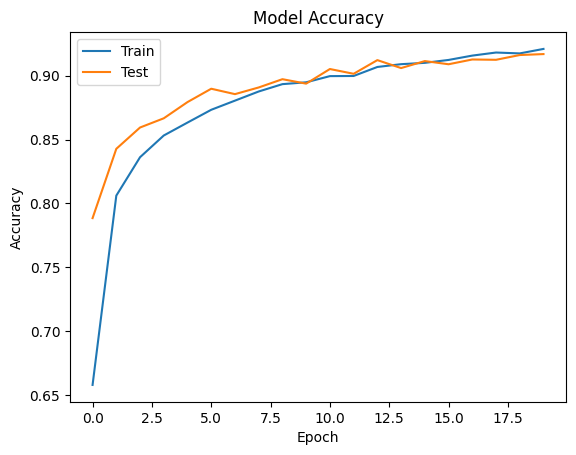

In [ ]:
# Plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

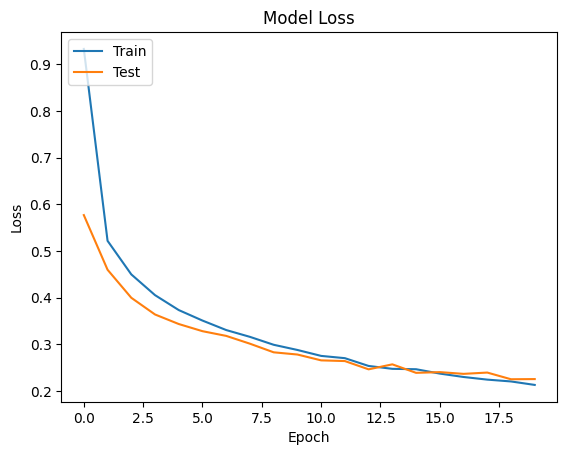

In [ ]:
# Plot loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

313/313 [==============================] - 13s 42ms/step


In [ ]:
# Calculating the metrics
accuracy = accuracy_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9139
Recall: 0.9138999999999999
Precision: 0.9153257500898032
F1-score: 0.9143248596952205
ROC AUC: 0.9948331611111112
